<a href="https://colab.research.google.com/github/gabriellbragaa/machine_learning/blob/main/tp1_ml(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIVISÃO DE TAREFAS:**

1.  MARCOS:
    - Importação dos dados
    - Análise dos dados
    - Predição com KNN
2.   KAUAN:
    - Pré-processamento
    - Random Forest
3.  GABRIEL:
    - Regressão logística
    - Análise Comparativa

**ETAPA DE IMPORTAÇÃO DOS DADOS**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carregar o dataset pelo ID (Predict Students Dropout and Academic Success)
dataset = fetch_ucirepo(id=697)

# Extrair dados em formato pandas
X = dataset.data.features
y = dataset.data.targets

**ETAPA DE ANÁLISE DOS DADOS**

In [ ]:
# Mostrar informações básicas
print("Shape (features):", X.shape)
print("Shape (targets):", y.shape)

# Garante que y seja uma Series com a coluna "Target"
y = y['Target']

Shape (features): (4424, 36)
Shape (targets): (4424, 1)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Juntando features e target para facilitar a análise
df = pd.concat([X, y], axis=1)

# Verificações iniciais
print("Tipos de dados:\n", df.dtypes)

Tipos de dados:
 Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int

In [ ]:
# Visualizar primeiras linhas
print("\nAmostra das features:")
print(X.head())


Amostra das features:
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2              

In [ ]:
print("\nAmostra dos targets:")
print(y.head())


Amostra dos targets:
0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object


In [ ]:
#Verifica se o dataset possui valores ausentes
print("\nValores ausentes por coluna:\n", df.isnull().sum())


Valores ausentes por coluna:
 Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder               

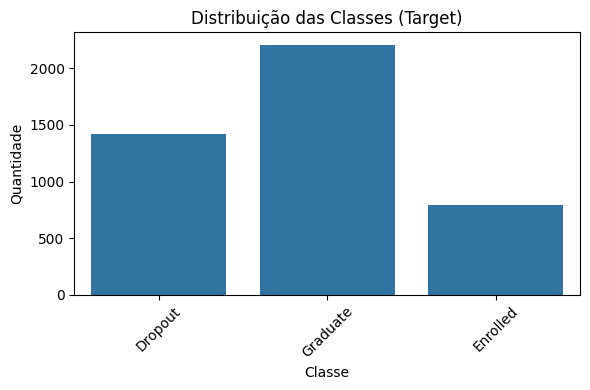

In [ ]:
# Distribuição do target (classe)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Target')
plt.title("Distribuição das Classes (Target)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**ETAPA DE PRÉ-PROCESSAMENTO**

Codificar variáveis categóricas

In [ ]:
# Identifica colunas object
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Aplica LabelEncoder em todas as colunas object
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("Colunas categóricas codificadas:", cat_cols)

Colunas categóricas codificadas: ['Target']


Mostrar valores únicos por coluna

In [ ]:
print(df.nunique().sort_values())

Daytime/evening attendance                          2
Displaced                                           2
Debtor                                              2
Educational special needs                           2
International                                       2
Scholarship holder                                  2
Gender                                              2
Tuition fees up to date                             2
Target                                              3
Marital Status                                      6
Application order                                   8
Inflation rate                                      9
Curricular units 2nd sem (without evaluations)     10
Unemployment rate                                  10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Course                                             17
Previous qualification                             17
Application mode            

Separando colunas categóricas e numéricas com base na cardinalidade

In [ ]:
# Colunas categóricas: até 10 valores únicos
cat_cols = [col for col in X.columns if X[col].nunique() <= 10]

# Colunas numéricas: todas as outras
num_cols = [col for col in X.columns if col not in cat_cols]

print("Colunas categóricas:", cat_cols)
print("Colunas numéricas:", num_cols)

Colunas categóricas: ['Marital Status', 'Application order', 'Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Colunas numéricas: ['Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 

Colunas com valores constantes (apenas para visualização, pois não existem colunas constantes)

In [ ]:
constant_cols = X.nunique()[X.nunique() == 1].index.tolist()
print("Colunas constantes:", constant_cols)

Colunas constantes: []


Separar X e y

In [ ]:
X = df[cat_cols + num_cols]
y = df['Target']

Dividindo as features e target

In [ ]:
# Separa X (features) e y (alvo)
X = df.drop(columns='Target')
y = df['Target']

Criando o ColumnTransformer (OneHot + StandardScaler)

In [ ]:
# Separando colunas categóricas e numéricas com base na cardinalidade
# Colunas categóricas: até 10 valores únicos
cat_cols = [col for col in X.columns if X[col].nunique() <= 10]

# Colunas numéricas: todas as outras
num_cols = [col for col in X.columns if col not in cat_cols]

print("Colunas categóricas:", cat_cols)
print("Colunas numéricas:", num_cols)

# Criando o ColumnTransformer (OneHot + StandardScaler)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

Colunas categóricas: ['Marital Status', 'Application order', 'Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Colunas numéricas: ['Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 

Dividir em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Aplicando pré-processamento nos dados

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Formato final do treino:", X_train_processed.shape)
print("Formato final do teste:", X_test_processed.shape)

Formato final do treino: (3539, 91)
Formato final do teste: (885, 91)


Versão SEM escalonamento do pré-processador

In [ ]:
preprocessor_sem_escala = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

X_train_no_scale = preprocessor_sem_escala.fit_transform(X_train)
X_test_no_scale = preprocessor_sem_escala.transform(X_test)

print("Formato (sem escala) - treino:", X_train_no_scale.shape)
print("Formato (sem escala) - teste:", X_test_no_scale.shape)

Formato (sem escala) - treino: (3539, 91)
Formato (sem escala) - teste: (885, 91)


**ETAPA DE PREDIÇÕES**

K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import pandas as pd

# Definir a estratégia de validação cruzada (k-Fold estratificado)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Definir o algoritmo: K-Nearest Neighbors
knn_model = KNeighborsClassifier()

# Definir diferentes hiper-parâmetros para KNN
# Vamos testar um intervalo de valores para n_neighbors
# O peso dos vizinhos também pode ser um hiperparâmetro interessante ('uniform' ou 'distance')
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15], # Número de vizinhos
    'classifier__weights': ['uniform', 'distance'] # Peso dos vizinhos
}

# Cria o Pipeline com pré-processamento e o modelo KNN
# Reutilizamos o 'preprocessor' já definido
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', knn_model)])

print("Iniciando a busca de hiperparâmetros para KNN com validação cruzada...")

# Configura o GridSearchCV para KNN
# Usamos a mesma estratégia de validação cruzada (cv_strategy) definida anteriormente
grid_search_knn = GridSearchCV(pipeline_knn,
                               param_grid=param_grid_knn,
                               cv=cv_strategy, # Usar cv_strategy definido anteriormente
                               scoring='accuracy', # Métrica para otimização
                               n_jobs=-1)

# Executa a busca de hiperparâmetros nos dados de treino originais
grid_search_knn.fit(X_train, y_train)

print("\nBusca de hiperparâmetros para KNN concluída.")
print(f"Melhores hiperparâmetros para KNN: {grid_search_knn.best_params_}")
print(f"Melhor score de validação cruzada para KNN: {grid_search_knn.best_score_:.4f}")

# Obtém o melhor modelo KNN (o pipeline com os melhores hiperparâmetros)
best_knn_model = grid_search_knn.best_estimator_

# Avalia o melhor modelo KNN no conjunto de teste
print("\nAvaliando o melhor modelo de KNN no conjunto de teste...") # Completei a frase aqui
y_pred_knn = best_knn_model.predict(X_test)

# Avaliação usando accuracy e classification_report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy de KNN no conjunto de teste: {accuracy_knn:.4f}")
print("Classification Report de KNN no conjunto de teste:\n", report_knn)

class_names = ['Dropout (0)', 'Enrolled (1)', 'Graduated (2)']

conf_matrix_df = pd.DataFrame(conf_matrix_knn, index=class_names, columns=class_names)

# Imprime a matriz de confusão formatada
print("Confusion Matrix de KNN no conjunto de teste (com rótulos):")
print(conf_matrix_df)

Iniciando a busca de hiperparâmetros para KNN com validação cruzada...

Busca de hiperparâmetros para KNN concluída.
Melhores hiperparâmetros para KNN: {'classifier__n_neighbors': 13, 'classifier__weights': 'uniform'}
Melhor score de validação cruzada para KNN: 0.7107

Avaliando o melhor modelo de KNN no conjunto de teste...
Accuracy de KNN no conjunto de teste: 0.6949
Classification Report de KNN no conjunto de teste:
               precision    recall  f1-score   support

           0       0.81      0.60      0.69       284
           1       0.38      0.18      0.25       159
           2       0.70      0.94      0.80       442

    accuracy                           0.69       885
   macro avg       0.63      0.57      0.58       885
weighted avg       0.67      0.69      0.66       885

Confusion Matrix de KNN no conjunto de teste (com rótulos):
               Dropout (0)  Enrolled (1)  Graduated (2)
Dropout (0)            170            32             82
Enrolled (1)           

Regressão Logística

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression,
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

# estratégia de validação cruzada
# para avaliar a performance do modelo de forma mais confiavel
# uso de (k-Fold estratificado)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Mostra o algoritmo de Regressão Logística
# vantagem: Teria uma rapida velocidade de predição e teste.
# com um tipo de decisão linear(hiperplano)
# No caso de desempenho com dados não lineares e desbalanceados, ele trabalha de maneira limitada
# Necessita de um pré-processamento
# Só modela relações lineares

model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Define diferentes hiper-parâmetros para Regressão Logística
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], # Força de regularização
    'classifier__penalty': ['l1', 'l2'] # Tipo de regularização. Usada para evitar overfitting ( aprende demais com o treino e não generaliza para dados novos)
}

# Criar o Pipeline com pré-processamento e o modelo
# O 'preprocessor' já foi definido nas células anteriores e inclui OneHotEncoder e StandardScaler
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

print("Iniciando a busca de hiperparâmetros para Regressão Logística com validação cruzada...")

# Configura o GridSearchCV
grid_search_lr = GridSearchCV(pipeline,
                              param_grid=param_grid,
                              cv=cv_strategy, # Estratégia de validação cruzada
                              scoring='accuracy', # Métrica para otimização
                              n_jobs=-1)

# Executa a busca de hiperparâmetros nos dados de treino
grid_search_lr.fit(X_train, y_train)

print("\nBusca de hiperparâmetros para Regressão Logística concluída.")
print(f"Melhores hiperparâmetros: {grid_search_lr.best_params_}")
print(f"Melhor score de validação cruzada: {grid_search_lr.best_score_:.4f}")

# Obtém (o pipeline com os melhores hiperparâmetros)
best_lr_model = grid_search_lr.best_estimator_


print("\nAvaliando o melhor modelo de Regressão Logística no conjunto de teste...")
y_pred_lr = best_lr_model.predict(X_test)

# Avaliação usando accuracy e classification_report
# gera um relatorio com as metricas para as classes recall, f1...
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Accuracy: Proporção de previsões corretas no conjunto de teste
print(f"Accuracy no conjunto de teste: {accuracy_lr:.4f}")
print("Classification Report no conjunto de teste:\n", report_lr)
print("Confusion Matrix no conjunto de teste:\n", conf_matrix_lr)

Iniciando a busca de hiperparâmetros para Regressão Logística com validação cruzada...

Busca de hiperparâmetros para Regressão Logística concluída.
Melhores hiperparâmetros: {'classifier__C': 1.0, 'classifier__penalty': 'l1'}
Melhor score de validação cruzada: 0.7649

Avaliando o melhor modelo de Regressão Logística no conjunto de teste...
Accuracy no conjunto de teste: 0.7650
Classification Report no conjunto de teste:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       284
           1       0.53      0.26      0.35       159
           2       0.78      0.94      0.86       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.66       885
weighted avg       0.74      0.76      0.74       885

Confusion Matrix no conjunto de teste:
 [[219  22  43]
 [ 45  42  72]
 [ 11  15 416]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

# Define o algoritmo: Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Definir diferentes hiper-parâmetros para Random Forest
# testa alguns valores para n_estimators, max_depth e min_samples_leaf
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300], # Número de árvores na floresta
    'classifier__max_depth': [None, 10, 20, 30], # Profundidade máxima da árvore
    'classifier__min_samples_leaf': [1, 2, 4], # Número mínimo de amostras em uma folha
}

# Criar o Pipeline com pré-processamento e o modelo Random Forest
# Reutilizamos o 'preprocessor' já definido
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', rf_model)])

print("Iniciando a busca de hiperparâmetros para Random Forest com validação cruzada...")

# Configura o GridSearchCV para Random Forest
grid_search_rf = GridSearchCV(pipeline_rf,
                              param_grid=param_grid_rf,
                              cv=cv_strategy, # Usar cv_strategy definido anteriormente
                              scoring='accuracy', # Métrica para otimização
                              n_jobs=-1)

# Executa a busca de hiperparâmetros nos dados de treino originais
grid_search_rf.fit(X_train, y_train)

print("\nBusca de hiperparâmetros para Random Forest concluída.")
print(f"Melhores hiperparâmetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Melhor score de validação cruzada para Random Forest: {grid_search_rf.best_score_:.4f}")

# Obtem o melhor modelo Random Forest (o pipeline com os melhores hiperparâmetros)
best_rf_model = grid_search_rf.best_estimator_

# Avalia o melhor modelo Random Forest no conjunto de teste
print("\nAvaliando o melhor modelo de Random Forest no conjunto de teste...")
y_pred_rf = best_rf_model.predict(X_test)

# Avaliação usando accuracy e classification_report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy de Random Forest no conjunto de teste: {accuracy_rf:.4f}")
print("Classification Report de Random Forest no conjunto de teste:\n", report_rf)
print("Confusion Matrix de Random Forest no conjunto de teste:\n", conf_matrix_rf)

Iniciando a busca de hiperparâmetros para Random Forest com validação cruzada...

Busca de hiperparâmetros para Random Forest concluída.
Melhores hiperparâmetros para Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}
Melhor score de validação cruzada para Random Forest: 0.7768

Avaliando o melhor modelo de Random Forest no conjunto de teste...
Accuracy de Random Forest no conjunto de teste: 0.7684
Classification Report de Random Forest no conjunto de teste:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       284
           1       0.58      0.31      0.41       159
           2       0.78      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885

Confusion Matrix de Random Forest no conjunto de teste:
 [[220  17  47]
 [ 41  50  68]
 [ 13 

Modelos com diferentes hiperparâmetros (com escalonamento)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("Random Forest – n_estimators=100")
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train_processed, y_train)
print(classification_report(y_test, rf1.predict(X_test_processed)))

print("Random Forest – n_estimators=200, max_depth=10")
rf2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf2.fit(X_train_processed, y_train)
print(classification_report(y_test, rf2.predict(X_test_processed)))

print("KNN – n_neighbors=3")
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_processed, y_train)
print(classification_report(y_test, knn1.predict(X_test_processed)))

print("KNN – n_neighbors=7")
knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_train_processed, y_train)
print(classification_report(y_test, knn2.predict(X_test_processed)))

print("Logistic Regression – C=1.0")
lr1 = LogisticRegression(C=1.0, max_iter=1000)
lr1.fit(X_train_processed, y_train)
print(classification_report(y_test, lr1.predict(X_test_processed)))

print("Logistic Regression – C=0.1, solver='liblinear'")
lr2 = LogisticRegression(C=0.1, solver='liblinear', max_iter=1000)
lr2.fit(X_train_processed, y_train)
print(classification_report(y_test, lr2.predict(X_test_processed)))

Random Forest – n_estimators=100
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       284
           1       0.53      0.34      0.42       159
           2       0.78      0.91      0.84       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.74      0.76      0.75       885

Random Forest – n_estimators=200, max_depth=10
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       284
           1       0.59      0.28      0.38       159
           2       0.77      0.94      0.85       442

    accuracy                           0.76       885
   macro avg       0.72      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885

KNN – n_neighbors=3
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       284
           1       0.26      

Treinando os modelos com dados sem escalonamento

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_no_scale, y_train)
print("Random Forest (sem escala):\n", classification_report(y_test, rf.predict(X_test_no_scale)))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_no_scale, y_train)
print("KNN (sem escala):\n", classification_report(y_test, knn.predict(X_test_no_scale)))

# Regressão Logística
lr = LogisticRegression(solver='saga', max_iter=3000)
lr.fit(X_train_no_scale, y_train)
print("Logistic Regression (sem escala):\n", classification_report(y_test, lr.predict(X_test_no_scale)))

Random Forest (sem escala):
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       284
           1       0.52      0.33      0.41       159
           2       0.78      0.91      0.84       442

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.74      0.76      0.74       885

KNN (sem escala):
               precision    recall  f1-score   support

           0       0.57      0.55      0.56       284
           1       0.31      0.24      0.27       159
           2       0.66      0.73      0.69       442

    accuracy                           0.58       885
   macro avg       0.51      0.51      0.51       885
weighted avg       0.57      0.58      0.57       885

Logistic Regression (sem escala):
               precision    recall  f1-score   support

           0       0.80      0.68      0.74       284
           1       0.43      0.06      0.10   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**ANÁLISE COMPARATIVA**


Comparação das Métricas dos Modelos no Conjunto de Teste:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.764972   0.703812  0.658818  0.663857
KNN                  0.694915   0.627639  0.574053  0.577892
Random Forest        0.768362   0.721756  0.672238  0.681559


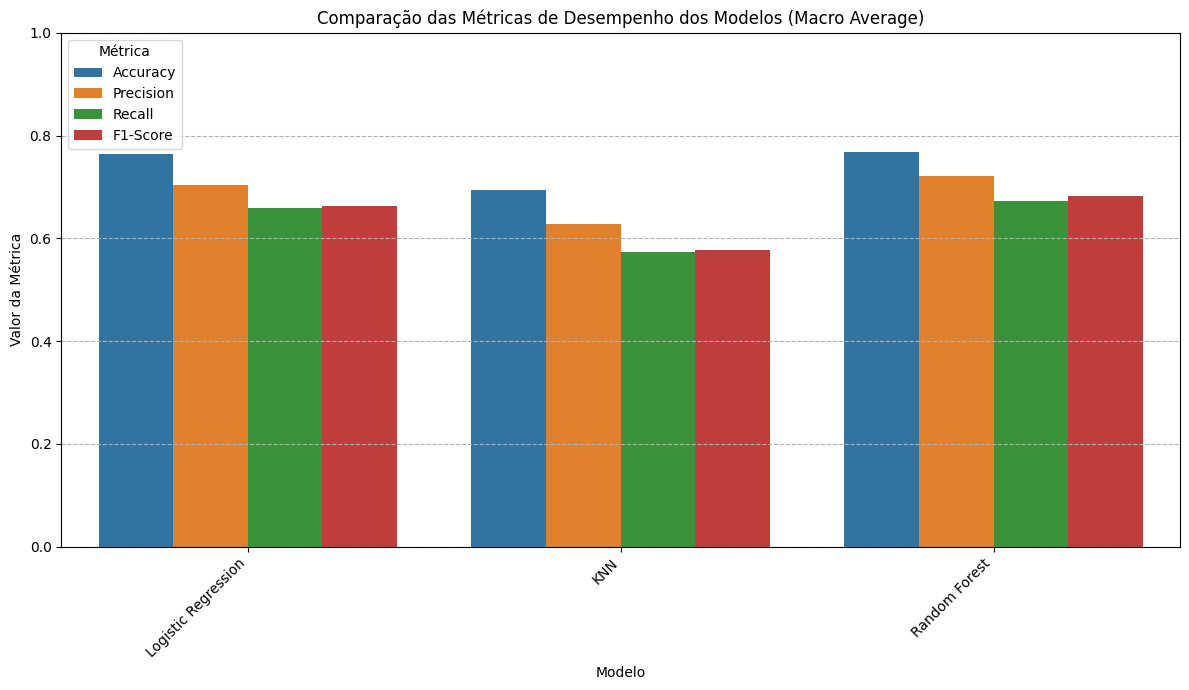

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Garantir que classification_report retorne um dicionário
report_lr_dict = classification_report(y_test, y_pred_lr, output_dict=True)
report_knn_dict = classification_report(y_test, y_pred_knn, output_dict=True)
report_rf_dict = classification_report(y_test, y_pred_rf, output_dict=True)

# Dicionário para armazenar as métricas de cada modelo
model_comparison_improved = {}

model_comparison_improved['Logistic Regression'] = {
    'Accuracy': report_lr_dict['accuracy'],
    'Precision': report_lr_dict['macro avg']['precision'],
    'Recall': report_lr_dict['macro avg']['recall'],
    'F1-Score': report_lr_dict['macro avg']['f1-score']
}

# Coleta as métricas do KNN
model_comparison_improved['KNN'] = {
    'Accuracy': report_knn_dict['accuracy'],
    'Precision': report_knn_dict['macro avg']['precision'],
    'Recall': report_knn_dict['macro avg']['recall'],
    'F1-Score': report_knn_dict['macro avg']['f1-score']
}

# Coleta as métricas do Random Forest
# Alta precisão significa poucos falsos positivos.
# Alto recall significa poucos falsos negativos.

model_comparison_improved['Random Forest'] = {
    'Accuracy': report_rf_dict['accuracy'],
    'Precision': report_rf_dict['macro avg']['precision'],
    'Recall': report_rf_dict['macro avg']['recall'],
    'F1-Score': report_rf_dict['macro avg']['f1-score']
}

# Cria um DataFrame a partir do dicionário
comparison_df_improved = pd.DataFrame(model_comparison_improved).T

print("\nComparação das Métricas dos Modelos no Conjunto de Teste:")
print(comparison_df_improved)

plt.figure(figsize=(12, 7))
sns.barplot(data=comparison_df_improved.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.title("Comparação das Métricas de Desempenho dos Modelos (Macro Average)")
plt.xlabel("Modelo")
plt.ylabel("Valor da Métrica")
plt.legend(title="Métrica", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0) # Definir limite y para métricas entre 0 e 1
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


--- Avaliando Regressão Logística SEM Escalonamento ---
Accuracy de Regressão Logística SEM escalonamento: 0.7593

--- Avaliando KNN SEM Escalonamento ---
Accuracy de KNN SEM escalonamento: 0.5831

--- Avaliando Random Forest SEM Escalonamento ---
Accuracy de Random Forest SEM escalonamento: 0.7582

Comparação de Métricas por Modelo (COM vs SEM Escalonamento):
                                  Accuracy  Precision (Macro)  Recall (Macro)  \
Logistic Regression (Scaled)      0.764972           0.703812        0.658818   
Logistic Regression (No Scaling)  0.759322           0.689560        0.644225   
KNN (Scaled)                      0.694915           0.627639        0.574053   
KNN (No Scaling)                  0.583051           0.513270        0.505599   
Random Forest (Scaled)            0.768362           0.721756        0.672238   
Random Forest (No Scaling)        0.758192           0.703062        0.666961   

                                  F1-Score (Macro)  
Logistic Regres

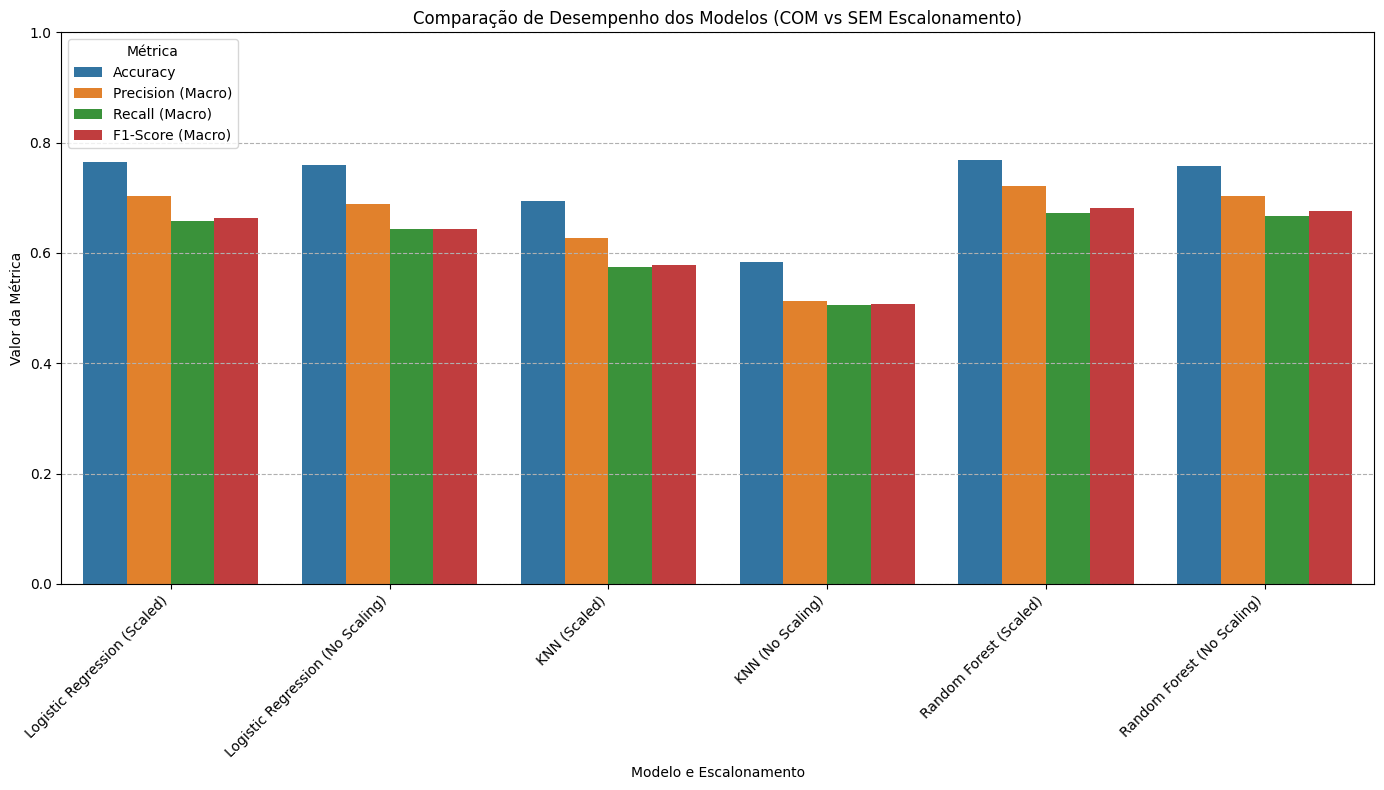

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


preprocessor_no_scaling = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

print("\n--- Avaliando Regressão Logística SEM Escalonamento ---")
pipeline_lr_no_scaling = Pipeline(steps=[('preprocessor', preprocessor_no_scaling),
                                         ('classifier', LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))])

# ver o impacto do escalonamento, então treinamos um modelo simples.
pipeline_lr_no_scaling.fit(X_train, y_train)
y_pred_lr_no_scaling = pipeline_lr_no_scaling.predict(X_test)
accuracy_lr_no_scaling = accuracy_score(y_test, y_pred_lr_no_scaling)
report_lr_no_scaling_dict = classification_report(y_test, y_pred_lr_no_scaling, output_dict=True)

print(f"Accuracy de Regressão Logística SEM escalonamento: {accuracy_lr_no_scaling:.4f}")

# Treinar e Avaliar KNN SEM Escalonamento
print("\n--- Avaliando KNN SEM Escalonamento ---")
pipeline_knn_no_scaling = Pipeline(steps=[('preprocessor', preprocessor_no_scaling),
                                          ('classifier', KNeighborsClassifier())])

# Treinar um modelo KNN básico sem otimização de hiperparâmetros para comparar o impacto do escalonamento
# Para uma comparação mais justa, você poderia rodar GridSearchCV com e sem escalonamento.
pipeline_knn_no_scaling.fit(X_train, y_train)
y_pred_knn_no_scaling = pipeline_knn_no_scaling.predict(X_test)
accuracy_knn_no_scaling = accuracy_score(y_test, y_pred_knn_no_scaling)
report_knn_no_scaling_dict = classification_report(y_test, y_pred_knn_no_scaling, output_dict=True)

print(f"Accuracy de KNN SEM escalonamento: {accuracy_knn_no_scaling:.4f}")


# Treinar e Avaliar Random Forest SEM Escalonamento
print("\n--- Avaliando Random Forest SEM Escalonamento ---")
pipeline_rf_no_scaling = Pipeline(steps=[('preprocessor', preprocessor_no_scaling),
                                         ('classifier', RandomForestClassifier(random_state=42))])

# Treinar um modelo Random Forest básico sem otimização de hiperparâmetros
# Para uma comparação mais justa, você poderia rodar GridSearchCV com e sem escalonamento.
pipeline_rf_no_scaling.fit(X_train, y_train)
y_pred_rf_no_scaling = pipeline_rf_no_scaling.predict(X_test)
accuracy_rf_no_scaling = accuracy_score(y_test, y_pred_rf_no_scaling)
report_rf_no_scaling_dict = classification_report(y_test, y_pred_rf_no_scaling, output_dict=True)

print(f"Accuracy de Random Forest SEM escalonamento: {accuracy_rf_no_scaling:.4f}")


# Comparação Final (COM vs SEM Escalonamento)

# Dicionário para armazenar as métricas de cada modelo COM e SEM escalonamento
scaling_comparison = {}

# Regressão Logística
scaling_comparison['Logistic Regression (Scaled)'] = {
    'Accuracy': report_lr_dict['accuracy'],
    'Precision (Macro)': report_lr_dict['macro avg']['precision'],
    'Recall (Macro)': report_lr_dict['macro avg']['recall'],
    'F1-Score (Macro)': report_lr_dict['macro avg']['f1-score']
}
scaling_comparison['Logistic Regression (No Scaling)'] = {
    'Accuracy': report_lr_no_scaling_dict['accuracy'],
    'Precision (Macro)': report_lr_no_scaling_dict['macro avg']['precision'],
    'Recall (Macro)': report_lr_no_scaling_dict['macro avg']['recall'],
    'F1-Score (Macro)': report_lr_no_scaling_dict['macro avg']['f1-score']
}

# KNN
scaling_comparison['KNN (Scaled)'] = {
    'Accuracy': report_knn_dict['accuracy'],
    'Precision (Macro)': report_knn_dict['macro avg']['precision'],
    'Recall (Macro)': report_knn_dict['macro avg']['recall'],
    'F1-Score (Macro)': report_knn_dict['macro avg']['f1-score']
}
scaling_comparison['KNN (No Scaling)'] = {
    'Accuracy': report_knn_no_scaling_dict['accuracy'],
    'Precision (Macro)': report_knn_no_scaling_dict['macro avg']['precision'],
    'Recall (Macro)': report_knn_no_scaling_dict['macro avg']['recall'],
    'F1-Score (Macro)': report_knn_no_scaling_dict['macro avg']['f1-score']
}

# Random Forest
scaling_comparison['Random Forest (Scaled)'] = {
    'Accuracy': report_rf_dict['accuracy'],
    'Precision (Macro)': report_rf_dict['macro avg']['precision'],
    'Recall (Macro)': report_rf_dict['macro avg']['recall'],
    'F1-Score (Macro)': report_rf_dict['macro avg']['f1-score']
}
scaling_comparison['Random Forest (No Scaling)'] = {
    'Accuracy': report_rf_no_scaling_dict['accuracy'],
    'Precision (Macro)': report_rf_no_scaling_dict['macro avg']['precision'],
    'Recall (Macro)': report_rf_no_scaling_dict['macro avg']['recall'],
    'F1-Score (Macro)': report_rf_no_scaling_dict['macro avg']['f1-score']
}

# Criar DataFrame para comparação de escalonamento
scaling_comparison_df = pd.DataFrame(scaling_comparison).T

print("\nComparação de Métricas por Modelo (COM vs SEM Escalonamento):")
print(scaling_comparison_df)

# Visualizar a comparação de escalonamento
plt.figure(figsize=(14, 8))
sns.barplot(data=scaling_comparison_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.title("Comparação de Desempenho dos Modelos (COM vs SEM Escalonamento)")
plt.xlabel("Modelo e Escalonamento")
plt.ylabel("Valor da Métrica")
plt.legend(title="Métrica", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0) # Definir limite y para métricas entre 0 e 1
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# KNN depende fortemente do escalonamento
# Regressão logistica mantém desempenho limitado em operações não lineares, ou seja, em operações mais complexas.
# Random forest ganha em todas as metricas, até no não escalonavel, ele mantém o padrão.
# Random forest é menos sensivel ao escalonamento